In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#importing dataset
df=pd.read_csv('Mall_Customers (1).csv')

In [3]:
#top 5 records
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#size of the data
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# finding null values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#describing the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#checking for duplicate
df.duplicated().sum()

0

In [9]:
#droping the serial number 
df.drop(['CustomerID'],axis=1,inplace=True)

In [10]:
df.head(1)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39


In [11]:
df['Annual Income (k$)'].nunique()

64

In [12]:
df['Spending Score (1-100)'].nunique()

84

In [13]:
df['Age'].nunique()

51

In [14]:
df['Genre'].nunique()

2

# Univeriate Analysis and Biveriate Analysis

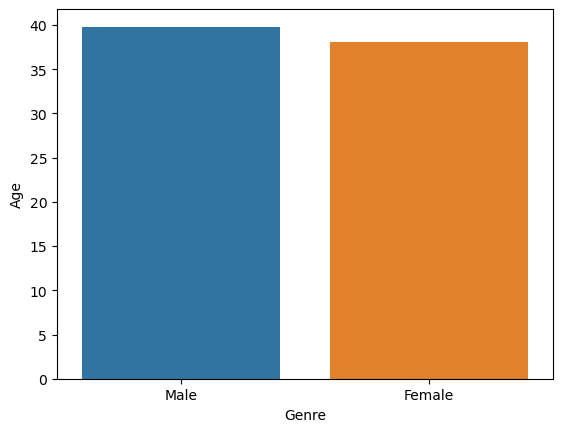

In [15]:
sns.barplot(x='Genre',y='Age',data=df,ci=None);

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

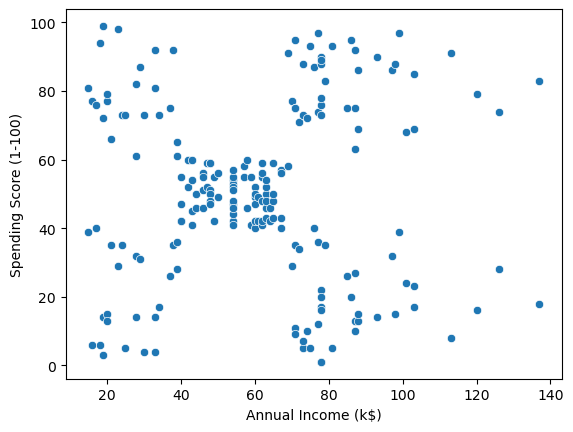

In [16]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

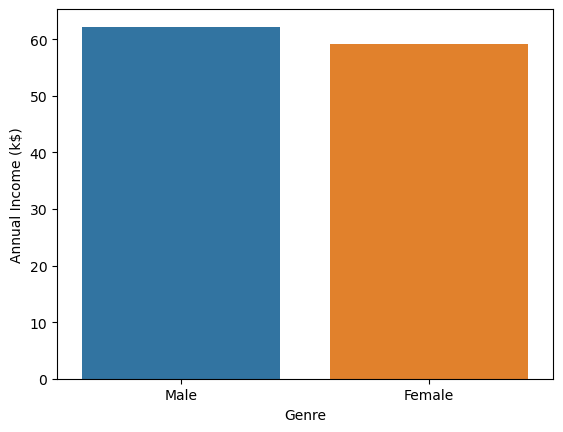

In [17]:
sns.barplot(x='Genre',y='Annual Income (k$)',data=df,ci=None);

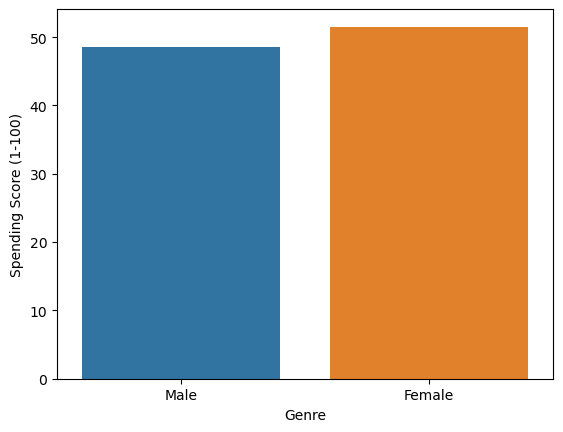

In [18]:
sns.barplot(x='Genre',y='Spending Score (1-100)',data=df,ci=None);

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

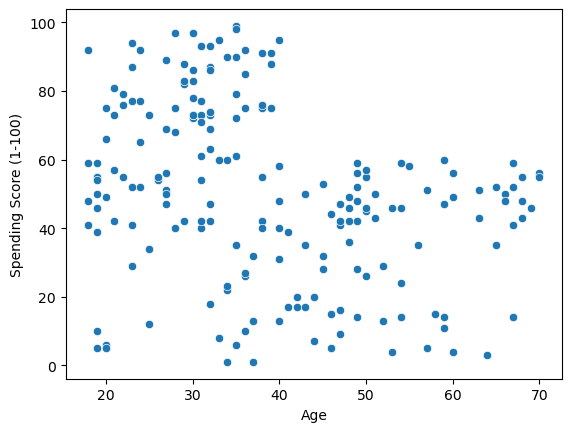

In [19]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

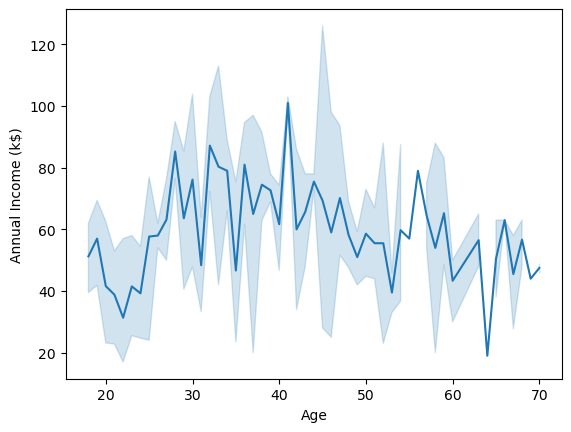

In [20]:
sns.lineplot(x='Age',y='Annual Income (k$)',data=df)

In [21]:
df['Genre']=pd.Categorical(df['Genre']).codes

###### Scaling the dataset

In [22]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler


In [23]:
# Creating an object for the StandardScaler function
x=StandardScaler()

In [24]:
scaled_df=pd.DataFrame(x.fit_transform(df.iloc[:,1:4]),columns=df.columns[1:])

In [25]:
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# K-Means Clustering


In [26]:
from sklearn.cluster import KMeans

##### Forming 2 cluster with K=2

In [27]:
# Create K Means cluster and store the result in the object k_means
k_means=KMeans(n_clusters=2,random_state=1)

In [28]:
# Fit K means on the scaled_df

k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

### Cluster Output for all the observations

In [29]:
# Get the labels
k_means.labels_

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

### Within Cluster Sum of Squares

In [30]:
k_means.inertia_

389.3861889564372

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [31]:
k_means=KMeans(n_clusters=3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

295.2122461555488

In [32]:
k_means=KMeans(n_clusters=4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

205.22514747675913

### Calculating WSS for other values of K - Elbow Method

In [33]:
wss=[]
for i in range (1,11):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(scaled_df)
    wss.append(km.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
wss

[599.9999999999999,
 389.3861889564372,
 295.2122461555488,
 205.22514747675913,
 168.24758017556834,
 133.86833362685584,
 117.13060763524544,
 103.81797230310197,
 92.86066988018615,
 81.6020758174705]

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

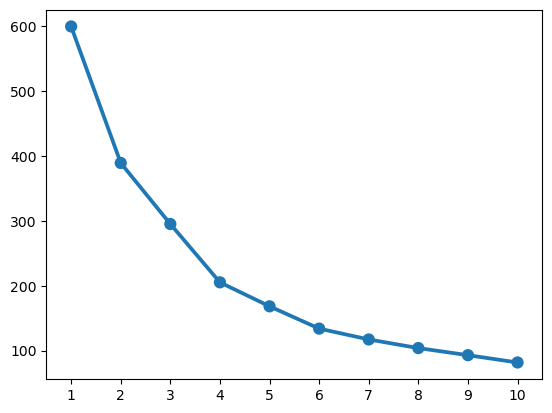

In [35]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a,wss)

# KMeans with K=4

In [36]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [37]:
k_means=KMeans(n_clusters=4,random_state=1)
k_means.fit(scaled_df)
labels=k_means.labels_

In [38]:
sil_score=silhouette_score(scaled_df,labels,random_state=1)
sil_score

0.4039582785148566

### Cluster evaluation for 4 clusters

In [39]:
# 4 clusters are good cluster compare to 3 cluster
k_means=KMeans(n_clusters=5,random_state=1)
k_means.fit(scaled_df)
labels=k_means.labels_

In [40]:
sil_score=silhouette_score(scaled_df,labels,random_state=1)
sil_score

0.41664341513732767

In [41]:
k_means=KMeans(n_clusters=6,random_state=1)
k_means.fit(scaled_df)
labels=k_means.labels_

In [42]:
sil_score=silhouette_score(scaled_df,labels,random_state=1)
sil_score

0.42742814991580175

In [43]:
k_means=KMeans(n_clusters=7,random_state=1)
k_means.fit(scaled_df)
labels=k_means.labels_

In [44]:
sil_score=silhouette_score(scaled_df,labels,random_state=1)
sil_score

0.4180766295787896

In [45]:
#silhoutte sample(silhoutte width,silhoutte coefficient)
sil_width=silhouette_samples(scaled_df,labels)
sil_width

array([ 0.00250177,  0.63328601,  0.08563194,  0.64389584,  0.02310231,
        0.63447427,  0.44003031,  0.61621419,  0.26260879,  0.55679833,
        0.09642549,  0.52076473,  0.35203604,  0.65989717,  0.45856335,
        0.65846462,  0.22486295,  0.45519696,  0.282701  ,  0.51859887,
        0.19271172,  0.60877843,  0.47984474,  0.53247937,  0.40427418,
        0.61125756,  0.20878433,  0.18888363,  0.23898172,  0.63050782,
        0.2998277 ,  0.52172561,  0.39819026,  0.5220314 ,  0.3903387 ,
        0.56356923,  0.35912008,  0.42677179,  0.1660923 ,  0.40606087,
        0.40895809,  0.51506093,  0.21480691,  0.03687087, -0.01811692,
        0.07704476,  0.29260357,  0.41681232,  0.40550012,  0.31950803,
        0.3836203 ,  0.14901131,  0.34437964,  0.30635652,  0.37701003,
        0.44499291,  0.32772529,  0.61251153,  0.49732844,  0.21584039,
        0.6185024 ,  0.40605026,  0.65145367,  0.04562334,  0.58813173,
        0.35412175,  0.50397141,  0.65737626,  0.36863658,  0.32

In [46]:
df['sil_width']=sil_width

In [47]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),sil_width
0,1,19,15,39,0.002502
1,1,21,15,81,0.633286
2,0,20,16,6,0.085632
3,0,23,16,77,0.643896
4,0,31,17,40,0.023102


In [48]:
df['sil_width'].mean()

0.4180766295787896

In [49]:
df['sil_width'].max()

0.6598971737813094

In [50]:
df['sil_width'].min()

-0.04133561696769415

In [51]:
df[df['sil_width']<=0]

,Genre,Age,Annual Income (k$),Spending Score (1-100),sil_width
44,0,49,39,28,-0.018117
138,1,19,74,10,-0.041336


In [52]:
df[df['sil_width']<=0].value_counts().sum()

2

In [53]:
df[df['sil_width']>=0]

,Genre,Age,Annual Income (k$),Spending Score (1-100),sil_width
0,1,19,15,39,0.002502
1,1,21,15,81,0.633286
2,0,20,16,6,0.085632
3,0,23,16,77,0.643896
4,0,31,17,40,0.023102
...,...,...,...,...,...
195,0,35,120,79,0.496064
196,0,45,126,28,0.359532
197,1,32,126,74,0.421621
198,1,32,137,18,0.323741


###### Appending Clusters to the original dataset

In [54]:
df['KMeans_clus_4']=labels

In [55]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),sil_width,KMeans_clus_4
0,1,19,15,39,0.002502,6
1,1,21,15,81,0.633286,3
2,0,20,16,6,0.085632,4
3,0,23,16,77,0.643896,3
4,0,31,17,40,0.023102,4


# Cluster Profiling

In [56]:
df['KMeans_clus_4'].value_counts().sort_index()

0    20
1    32
2    39
3    22
4    20
5    34
6    33
Name: KMeans_clus_4, dtype: int64

In [57]:
clust_pro=df.iloc[:,1:6].groupby('KMeans_clus_4').mean()
clust_pro['Freq']=df['KMeans_clus_4'].value_counts().sort_index()
clust_pro

,Age,Annual Income (k$),Spending Score (1-100),sil_width,Freq
KMeans_clus_4,,,,,
0,64.850000,53.150000,49.850000,0.527528,20
1,41.000000,89.406250,15.593750,0.296962,32
2,32.692308,86.538462,82.128205,0.505472,39
3,25.272727,25.727273,79.363636,0.522807,22
4,45.400000,25.650000,18.550000,0.267301,20
5,47.382353,56.882353,47.088235,0.367507,34
6,24.575758,54.545455,49.181818,0.439563,33
